<a href="https://colab.research.google.com/github/SemihAkkoc/machine_learning/blob/main/hello_world_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras, nn
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = keras.utils.normalize(x_train, axis=1)
x_test = keras.utils.normalize(x_test, axis=1)

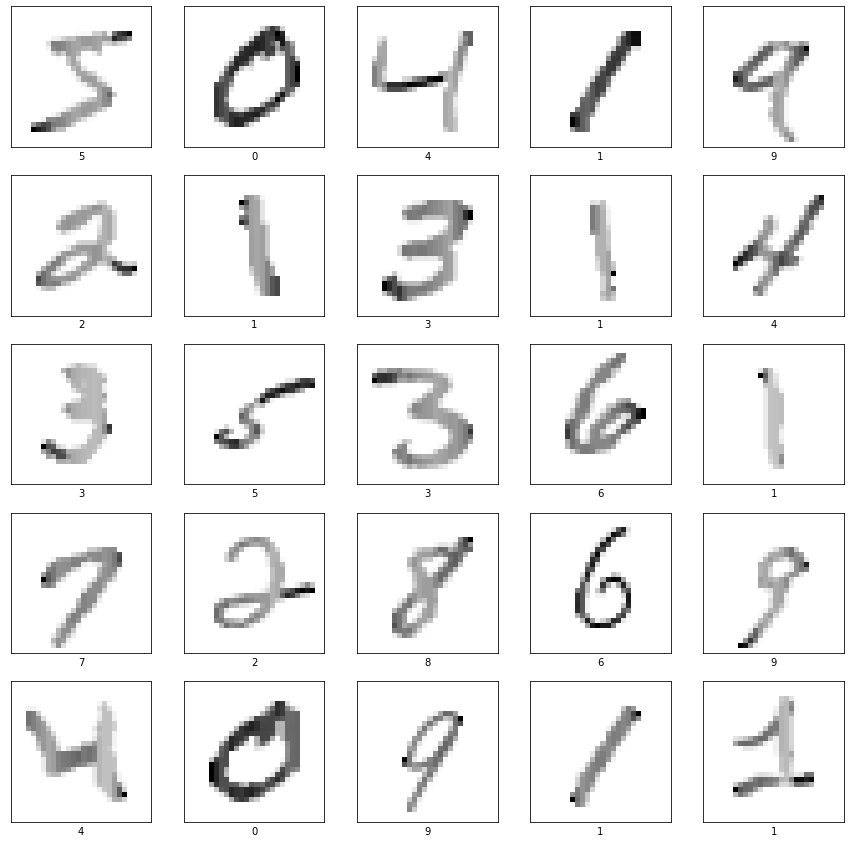

In [2]:
# to visualize
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [3]:
model = keras.models.Sequential([keras.layers.Flatten(),
                                 keras.layers.Dense(128, activation=nn.relu),
                                 keras.layers.Dense(128, activation=nn.relu),
                                 keras.layers.Dense(10, activation=nn.softmax)])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [4]:
model.fit(x_train, y_train, epochs=3)
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2649 - accuracy: 0.9209
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1098 - accuracy: 0.9656
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.0918 - accuracy: 0.9722
0.09180887788534164 0.9721999764442444


In [5]:
predictions = model.predict([x_test])

accuracy out of 25 is 1.00


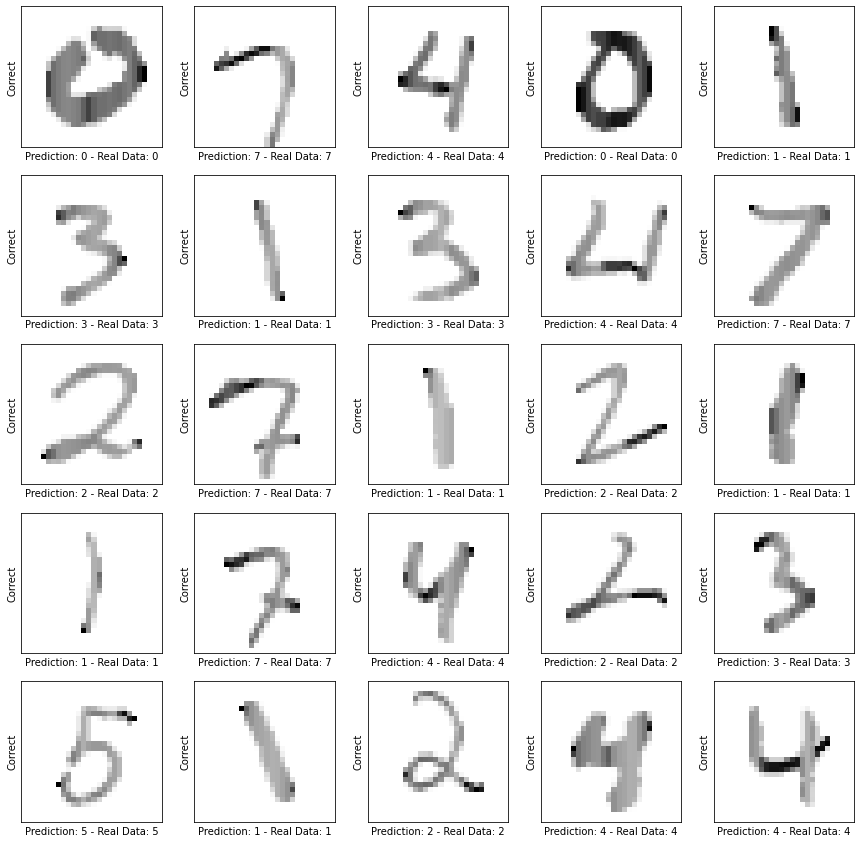

accuracy out of 25 is 1.00


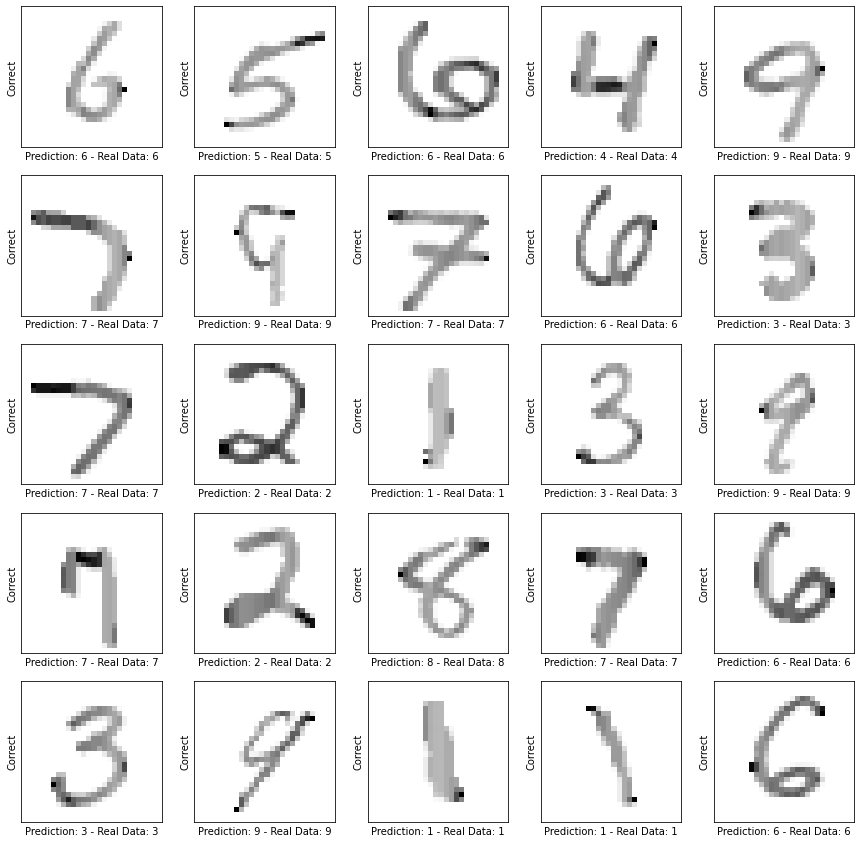

In [6]:
import time

for j in range(2):
    # plt.clf()
    plt.figure(figsize=(15,15))
    correct = 0
    for i in range(25):
        plt.subplot(5, 5, i+1)
        k = (j+1)*(25+i)
        plt.imshow(x_test[k], cmap=plt.cm.binary)
        plt.xlabel(f'Prediction: {np.argmax(predictions[k])} - Real Data: {y_test[k]}')
        plt.xticks([])
        plt.yticks([])
        if np.argmax(predictions[k]) == y_test[k]:
            plt.ylabel('Correct')
            correct += 1
        else:
            plt.ylabel('Wrong')
    print(f'accuracy out of 25 is {correct/25:.2f}')
    plt.show()
    time.sleep(5)